In [1]:
# imporing necessary packages
import pandas as pd
import numpy as np
import sympy.mpmath as math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import pylab
%matplotlib inline

In [4]:
def data_load(filename):
    '''Loads data in CSV format, produces pandas dataframe for data, 
    and converts index to datetime, only input required is 
     the file paths'''
    ''' input must have date column labeled 'DATE', and the file path 
    must be in quotes'''
    
    assert type(filename) == str, 'filename_1 should be a string'

    # loading the first dataset and changing the index column to the date
    dataset = pd.read_csv(filename, sep=',', index_col='Date')
    # converting the date index to datetime
    dataset.index = pd.to_datetime(dataset.index)
    
    return dataset
    

In [6]:
zoo_2015 = data_load('../Data/zooplankton_2015.csv')

In [60]:
zoo_2015.head()

,Cnidaria,Ctenophora,Copoepoda,Cirripedia,Ostracoda,Branchiopoda,Malacostraca,Bryozoan,Phorinida,Chaetognatha,Chordata,Mollusca,Echinodermata,Urochordata,Annelids,Eggs,unidentifed,Unnamed: 18,Unnamed: 19,Total
Date,,,,,,,,,,,,,,,,,,,,
2015-04-01,16,1,834,157,90,0,161,76,8,2,5,12,4,91,0,130,16,1604,1442.24,1603
2015-04-07,5,0,742,11,7,0,12,47,0,14,185,10,0,1,0,0,5,1039,1026.17,1038
2015-05-08,8,0,879,456,83,0,149,101,24,4,0,9,2,111,0,191,8,2028,1877.86,2026
2015-05-14,0,1,712,131,71,0,23,15,0,0,0,1,1,3,0,356,0,1317,1292.63,1316
2015-05-22,0,1,1020,361,124,0,45,35,0,0,0,1,0,32,0,407,0,2026,1980.66,2025


In [67]:
temp_2015 = data_load('../Data/temp_2015.csv')

In [68]:
temp_2015.head()

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
Date,,,,,,,,,,,
2015-04-07,9.7,9.6,9.6,9.6,9.5,9.5,9.5,9.5,9.5,9.5,9.5
2015-04-14,9.6,9.6,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5,9.5
2015-04-29,9.9,9.9,9.8,9.8,9.8,9.8,9.8,9.8,9.8,9.8,9.8
2015-05-08,11.6,11.5,11.5,11.5,11.5,11.4,11.5,11.5,10.7,10.6,10.3
2015-05-14,10.3,10.3,10.3,10.3,10.2,10.2,10.2,10.2,10.2,10.2,10.2


In [ ]:
temp_

(0, 2500)

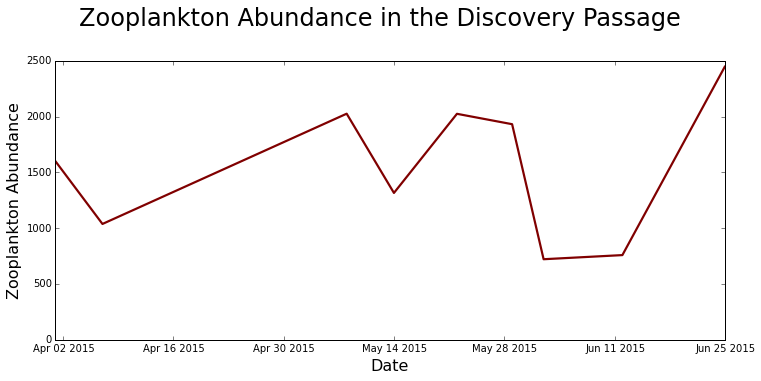

In [59]:
# plotting the zooplankton abundance in the Discovery Passage over time 

# setting the figure size
fig = plt.figure(figsize=(12, 5))

# adding a title to the graph
plt.suptitle('Zooplankton Abundance in the Discovery Passage', fontsize=24, y=1.05)

# plotting the zooplankton over time
plt.plot(zoo_2015.index, zoo_2015.Total, 'maroon', linewidth=2.2)

# labeling the x and y axes
plt.xlabel('Date', fontsize=16, )
plt.ylabel('Zooplankton Abundance', fontsize=16)

# setting the extremities to the y axis
plt.ylim([0, 2500])




//anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


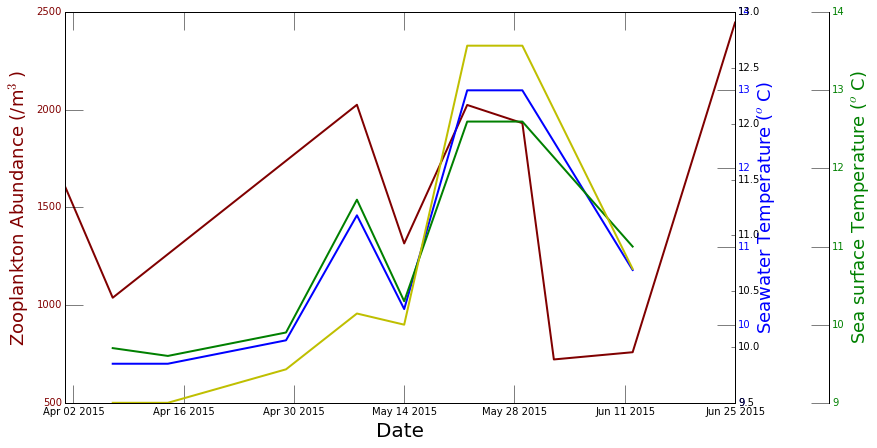

In [76]:
fig = plt.figure(figsize=(12, 7))

# Adding a title to the graph
# plt.suptitle('Comparing Model Simulations to 2009 Zooplankton Data', fontsize=30, y=1.05)

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()


# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(zoo_2015.index, zoo_2015.Total, 'maroon', linewidth =2)
ax2.plot(temp_2015.index, temp_2015.m_5, 'b', linewidth=2)
ax3.plot(temp_2015.index, temp_2015.m_0, 'g', linewidth=2)
ax4.plot(temp_2015.index, temp_2015.m_10, 'y', linewidth=2)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
temp_2015.m_0_spine = ax3.spines['right']
temp_2015.m_0_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.xaxis.set_tick_params(labelcolor='k', size=18)
ax1.yaxis.set_tick_params(labelcolor='maroon', size=18)
ax2.yaxis.set_tick_params(labelcolor='b', size=18)
ax3.yaxis.set_tick_params(labelcolor='g', size=18)

# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('Zooplankton Abundance' + ' (/m$^3$)', fontsize = 18, color ='maroon')
ax2.set_ylabel('Seawater Temperature' + ' ($^o$C)', fontsize = 18, color='blue')
ax3.set_ylabel('Sea surface Temperature' + ' ($^o$C)', fontsize = 18, color='green')

ax2.set_ylim(9,14)
ax3.set_ylim(9,14)

legend = ax2.legend(loc='upper center', shadow=True)

plt.show()